# **Projet : Analyse textuelle d'un corpus constitué via Web scraping**

________________________________________________________________________________

**Première partie : Constitution du corpus**

L'analyse textuelle est une technique très utilisé en Sociologie. L'un des enjeux est souvent de mettre en lien des usages spécifiques et covariants de certains mots. L'analyse de l'actualité est un bon exemple d'application, dans le but, par exemple, de comparer les contenus des publications. Pour réaliser de telles analyses, la constitution du corpus des textes est une étape clé. La constitution d'un corpus de textes est une étape cruciale pour mener à bien de telles analyses.

*Étape 1 : Sélection du thème d’analyse*

Je me concentrerai sur l'analyse des discours dans l'actualité. Pour cela, je sélectionnerai un thème d'actualité sur le site https://www.vie-publique.fr/discours-dans-lactualite parmi une liste de sujets proposés.

Les données collectées sont uniquement des textes de discours publics et ne contiennent pas d'informations personnelles identifiables sur des individus ou si ces données sont déjà publiques et destinées à la publication, l'activité pourrait ne pas contrevenir au RGPD.

*Étape 2 : Web scraping*

Après avoir choisi le sujet, je procéderai à la création d'un corpus textuel en extrayant les données des articles de presse relatifs à ce sujet. Par exemple, si le thème choisi est "La Coupe du monde de football dans les discours publics", il sera nécessaire de récupérer les textes de la page web principale et des entretiens associés.

Cette étape aboutira à la création d'un fichier texte (.txt) contenant le contenu textuel des pages web sélectionnées.

**Deuxième partie : Analyse du corpus**

La deuxième partie du projet implique le traitement et la visualisation du corpus constitué.

*Étape 1 : Traitement du corpus*

Dans cette phase, j'utilise la bibliothèque SpaCy pour traiter le corpus.

Les étapes incluent :

*   L'élimination des mots vides, qui sont souvent sans signification dans l'analyse.
*   La sélection de catégories de mots spécifiques, telles que les noms (NOUN) et les adjectifs (ADJ), qui sont essentiels pour mon étude.
*   L'identification des entités nommées, si cela s'avère pertinent pour mon analyse.
*   La détermination des mots les plus fréquents dans le corpus pour mettre en évidence les tendances et motifs.

*Étape 2 : Visualisation*

Pour la visualisation des données extraites, j'utilise les bibliothèques telles que WordCloud pour créer des nuages de mots et TextNet pour illustrer les réseaux de mots. Ces outils permettront de visualiser les résultats de manière intuitive et significative, facilitant l'interprétation des données.

________________________________________________________________________________

**L'accueil des Gens du voyage dans les discours publics**

Content L'expression "Gens du voyage" correspond en France à un statut administratif destiné, depuis la loi du 3 janvier 1969, aux personnes qui vivent de façon permanente dans un habitat mobile terrestre ou qui exercent une activité ambulante. L'accueil de ces populations fait l'objet d'une politique publique. Selon le rapport du Défenseur des droits publié le 6 octobre 2021, "Gens du voyage : lever les entraves aux droits", des discriminations systémiques sont constatées à l’égard des Gens du voyage en matière de logement, d’accès à l’éducation ou encore à la santé.
Depuis le début des années 90, la politique d'accueil des Gens du voyage a connu différents moments. De la reconnaissance d'une obligation d'accueil à des mesures plus répressives, évolution de la politique à l'égard des Gens du voyage à travers les discours publics.   
Au cœur des débats sociétaux, la question des "gens du voyage" en France cristallise des enjeux multidimensionnels, entre préservation des modes de vie nomades, droits fondamentaux, et défis d'intégration au sein d'une société majoritairement sédentaire. Comment ces dynamiques complexes se manifestent-elles dans les discours politiques, les déclarations officielles, et les médias, façonnant ainsi la perception collective de cette communauté ? À travers quels schémas linguistiques et représentations s'expriment les acteurs politiques dans leur tentative de résoudre les dilemmes entre diversité culturelle et exigences de stabilité sociale ? En scrutant le corpus constitué de ces discours, et comment ces nuances peuvent-elles éclairer notre compréhension des enjeux contemporains liés à cette communauté ?


Pour **la première partie**, en employant le module Selenium avec le navigateur Chrome pour extraire des données à partir de pages web, nous concevons le code essentiel pour mener à bien cette opération. Les étapes comprennent l'installation des packages, la configuration du navigateur Chrome avec Selenium, l'initialisation du navigateur, le scraping du contenu de la première page, la définition d'une liste loadUrls contenant plusieurs URL supplémentaires, et l'utilisation de BeautifulSoup pour analyser le code HTML de la page. Enfin, le contenu de la page est exporté dans Google Drive sous le nom de fichier "output.txt".

In [ ]:
#Scraping les liens dans le contenu de la page

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

def get_html_selenium(url):
    # Configurer Selenium WebDriver à l'aide de webdriver_manager
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    driver = webdriver.Chrome(options=options)

    driver.get(url)

    # Récupérer le contenu HTML de la page
    html_content = driver.page_source

    # Fermez le WebDriver
    driver.quit()

    return html_content

def scrape_linked_articles(main_url):

    main_html = get_html_selenium(main_url)
    main_soup = BeautifulSoup(main_html, 'html.parser')


    # Trouver toutes les balises d'ancrage avec l'attribut 'href'
    links = main_soup.find_all('a', href=True)

    # Filtrer les liens
    article_links = [link['href'] for link in links if 'legifrance.gouv.fr' in link['href'] or 'vie-publique.fr/discours' in link['href']]

    articles = []
    for link in article_links:
        article_html = get_html_selenium(link)
        article_soup = BeautifulSoup(article_html, 'html.parser')

        title = article_soup.find('title').get_text() if article_soup.find('title') else 'No Title'
        articles.append({'title': title, 'url': link, 'content': article_html})

    return articles

# URL de l'article principal
main_article_url = "https://www.vie-publique.fr/discours-dans-lactualite/282354-laccueil-des-gens-du-voyage-dans-les-discours-publics"

# Scraping les articles liés
linked_articles = scrape_linked_articles(main_article_url)
del linked_articles [0:4]

# Les résultats
for article in linked_articles:
    print(f"Title: {article['title']}")
    print(f"URL: {article['url']}")
    print(f"Content: {article['content'][:500]}...")  # Print first 500 characters of content
    print("\n---\n")

Title: Loi n° 90-449 du 31 mai 1990 visant à la mise en oeuvre du droit au logement (1) - Légifrance
URL: https://www.legifrance.gouv.fr/loda/id/JORFTEXT000000159413/
Content: <html lang="fr" class="js svg fontface" dir="ltr" style=""><head><title>Loi n° 90-449 du 31 mai 1990 visant à la mise en oeuvre du droit au logement (1) - Légifrance</title><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="description" content="Loi n° 90-449 du 31 mai 1990 visant à la mise en oeuvre du droit au logement (1)"><meta name="author" content=""><meta name="format-detection" content...

---

Title: Prononcé le 18 janvier 1995 - Simone Veil 18011995 intégration sociale des gens du voyage | vie-publique.fr
URL: https://www.vie-publique.fr/discours/222828-declaration-de-mme-simone-veil-ministre-des-affaires-sociales-de-la-san
Content: <html lang="fr" dir="ltr" prefix="og: https://ogp.me/ns#" class=" js"

Pour constituer notre corpus, j'ai choisi les textes suivants :

*   1ere mention des gens du voyage qui va déboucher sur la loi Besson : 18 janvier 1995 https://www.vie-publique.fr/discours/222828-declaration-de-mme-simone-veil-ministre-des-affaires-sociales-de-la-san

Accueil et habitat des gens du voyage : les lois Besson I et II : Votée en 1990, la loi sur le droit au logement - dite loi Besson I - oblige les villes de plus de 5 000 habitants à prévoir des conditions de passage et de séjour des gens du voyage sur son territoire, par la réservation de terrains aménagés à cet effet. En janvier 1995, lors d’une réunion de la Commission nationale consultative des gens de voyage (créée en 1992), Simone Veil, alors ministre des affaires sociales, de la santé et de la ville, réclame pour les Gens de voyage une meilleure intégration. Déclaration de Mme Simone Veil, ministre des affaires sociales de la santé et de la ville, sur ses propositions pour une meilleure intégration sociale des Gens du voyage et notamment des tziganes, Paris le 18 janvier 1995.

*   Déclaration de Besson sur sa loi 21 juin 2000 : http://www.vie-publique.fr/discours/140624-declaration-de-m-louis-besson-secretaire-detat-au-logement-sur-le-pr

Quatre ans plus tard, un projet de loi relatif à l’accueil des gens du voyage est déposé, définissant un nouvel équilibre entre l’aspiration des Gens du voyage à pouvoir stationner dans des conditions décentes et le souci des élus locaux d’éviter des stationnements illicites. La loi du 5 juillet 2000 relative à l’accueil et à l’habitat des gens du voyage, dite loi Besson II, reprend de façon plus contraignante des mesures déjà existantes. Elle oblige toutes les communes de plus de 5 000 habitants à participer au "schéma départemental d’accueil" et dispose aussi que les Gens du voyage ont droit à la libre circulation sur le territoire. Conférence de presse de M. Louis Besson, secrétaire d'Etat au logement, sur le projet de loi sur l'accueil des gens du voyage, à Paris le 12 mai 1999. Déclaration de M. Louis Besson, secrétaire d'Etat au logement, sur le projet de loi relatif à l'accueil et à l'habitat des gens du voyage, au Sénat, le 21 juin 2000. Dix ans après la loi Besson I, le bilan est modeste et à peine 30% des communes concernées se sont effectivement dotées d'aires de stationnement.

*   Président Sarkozy, 28 juillet 2010 : https://www.vie-publique.fr/discours/179655-communique-de-la-presidence-de-la-republique-en-date-du-28-juillet-2010

Les débordements commis par des membres de la communauté des Gens du voyage mi-juillet 2010 à Saint-Aignan (Loir-et-Cher) à la suite de la mort de l’un des leurs entrainent une réaction de l'État. Le président de la République Nicolas Sarkozy réunit le Premier ministre et les ministres concernés, le 28 juillet, sur la situation des Gens du voyage et des Roms en France. "Les événements survenus dans le Loir-et-Cher soulignent les problèmes que posent les comportements de certains parmi les Roms et les Gens du Voyage". Déclaration en Conseil des ministres de M. Nicolas Sarkozy, Président de la République, sur les questions de sécurité, notamment l'annonce de la nomination d'un nouveau préfet de l'Isère et de la tenue d'une réunion sur les gens du voyage et les Roms, le 21 juillet 2010. Communiqué de la Présidence de la République, en date du 28 juillet 2010, sur la situation des gens du voyage et des Roms en France. Le 30 juillet 2010, le président de la République prononce "le discours de Grenoble" qui marque une accélération de la politique de sécurité. Le Président dénonce notamment les camps illégaux de Roms "Ce sont des zones de non-droit qu'on ne peut pas tolérer en France", et annonce que les forces de l'ordre vont "procéder d'ici fin septembre au démantèlement de l'ensemble des camps qui font l'objet d'une décision de justice". Déclaration de M. Nicolas Sarkozy, Président de la République, sur la lutte contre la criminalité, la délinquance et l'immigration illégale, à Grenoble le 30 juillet 2010. À la suite de ces déclarations, une série d'expulsions de Roms et de démantèlement de campements illicites est mise en place. En août 2021, le comité pour l’élimination de la discrimination raciale (CERD) présente un rapport recommandant à la France "d’éviter les rapatriements collectifs" de Roms et condamnant les discours politiques racistes ainsi que les reconduites massives à la frontière.

*   Discours après le démantèlement, 24 août 2010 : https://www.vie-publique.fr/discours/179813-communique-des-services-du-premier-ministre-en-date-du-24-aout-2010-su

Communiqué des services du Premier ministre, en date du 24 août 2010, sur la politique de reconduite dans leur pays d'origine des Roms en situation irrégulière ou souhaitant bénéficier d'une aide humanitaire au retour. Conférence de presse de M. Nicolas Sarkozy, Président de la République, notamment sur la question des Roms en France et dans l'Union européenne, à Bruxelles le 16 septembre 2010. Déclaration de M. Pierre Lellouche, secrétaire d'Etat aux affaires européennes, sur la question des Roms au sein de l'Union européenne, à Strasbourg le 20 octobre 2010. En 2012, lors d’une réunion interministérielle sur les Gens du voyage, le Premier ministre, Jean-Marc Ayrault, annonce l’assouplissement des conditions d’embauche des Roumains et Bulgares.              

*   Loi égalité et citoyenneté, 27 janvier 2017 : http://www.vie-publique.fr/discours/185726-communique-des-services-du-premier-ministre-en-date-du-22-aout-2012-su

Communiqué des services du Premier ministre, en date du 22 août 2012, sur les principes et les priorités du gouvernement concernant la situation des Roms. La loi n° 69-3 du 3 janvier 1969, fortement critiqué pour son caractère discriminatoire, a été abrogée par la loi n° 2017-86 du 27 janvier 2017 relative à l'égalité et à la citoyenneté et supprime le statut spécifique des Gens du voyage (notamment le livret de circulation).

*   Dernier discours politique sur le sujet le 19 août 2014 : http://www.vie-publique.fr/discours/192088-declaration-de-m-harlem-desir-secretaire-detat-aux-affaires-europeenn

Déclaration de M. Harlem Désir, secrétaire d'Etat aux affaires européennes, en réponse à une question sur le cadre européen pour les stratégies nationales d'intégration des Roms, à l'Assemblée nationale le 19 août 2014.

Les "gens du voyage" en France font référence à une communauté nomade traditionnelle qui se déplace régulièrement à travers le pays. Cette population, également appelée communément "gitans", "tsiganes" ou "roms", possède une culture distincte, caractérisée par des modes de vie nomades, des traditions musicales et artistiques riches, ainsi que des coutumes spécifiques. Les gens du voyage ont une histoire complexe et ont souvent été confrontés à des stéréotypes et à des préjugés. En France, ils sont reconnus en tant que minorité ethnique et bénéficient de droits spécifiques, bien que leur situation puisse parfois être marquée par des défis liés à l'accès au logement, à l'éducation et à l'emploi. La coexistence entre cette communauté et la société s'accompagne de questions délicates, suscitant des débats sur l'inclusion et les droits de l'homme.

In [ ]:
#Choisir les liens important pour faire le corpus et scraper le contenu des corpus

from selenium import webdriver
import os
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

targetURL = "https://www.vie-publique.fr/discours-dans-lactualite/282354-laccueil-des-gens-du-voyage-dans-les-discours-publics"

driver = webdriver.Chrome(options=options)

driver.get(targetURL)

time.sleep(2)

soup = BeautifulSoup(driver.page_source, 'html.parser')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

with open('/content/drive/My Drive/output.txt', 'w') as f:
    f.write("Title: " + soup.find_all("h1", {"class": "fr-h1"})[0].get_text())

    content = soup.find_all("div", {"class": ["field--name-field-paragraphe", "field"]})[0]

    f.write(
        "\n\nContent: " +
        soup.find_all("p", {"class": "fr-text--lead"})[0].get_text().strip().replace("\n\n", "") + "\n" +
        content.get_text().strip().replace("\n\n", "")
    )


    urls = content.find_all('a', href=True)

    loadUrls = [
        "https://www.vie-publique.fr/discours/222828-declaration-de-mme-simone-veil-ministre-des-affaires-sociales-de-la-san",
        "http://www.vie-publique.fr/discours/140624-declaration-de-m-louis-besson-secretaire-detat-au-logement-sur-le-pr",
        "https://www.vie-publique.fr/discours/179655-communique-de-la-presidence-de-la-republique-en-date-du-28-juillet-2010",
        "https://www.vie-publique.fr/discours/179722-declaration-de-m-nicolas-sarkozy-president-de-la-republique-sur-la-lu",
        "https://www.vie-publique.fr/discours/179813-communique-des-services-du-premier-ministre-en-date-du-24-aout-2010-su",
        "http://www.vie-publique.fr/discours/185726-communique-des-services-du-premier-ministre-en-date-du-22-aout-2012-su",
        "http://www.vie-publique.fr/discours/192088-declaration-de-m-harlem-desir-secretaire-detat-aux-affaires-europeenn",
    ]

    for url in loadUrls:
      driver.get(url)
      time.sleep(2)

      html = BeautifulSoup(driver.page_source, 'html.parser')
      f.write("Title: " + html.find_all("h1")[0].get_text().strip().replace("\n\n", ""))
      content = html.find_all("div", {"class": ["field--name-field-paragraphe", "field"]})[0]
      f.write(
        "\n\nContent: " +
        soup.find_all("p", {"class": "fr-text--lead"})[0].get_text().strip().replace("\n\n", "") + "\n" +
        content.get_text().strip().replace("\n\n", "")
      )

      f.write("\n\n\n")

    driver.close()


Mounted at /content/drive


Pour **la deuxième partie**, nous avons employé la bibliothèque SpaCy pour le traitement du corpus. Les résultats ont été visualisés en utilisant la bibliothèque WordCloud, qui génère un nuage de mots à partir de la chaîne de texte résultant de la concaténation des tokens. En outre, la bibliothèque matplotlib.pyplot a été utilisée pour afficher le nuage de mots sur la figure.

Filtered tokens saved to /content/drive/MyDrive/filtered_tokens.xlsx


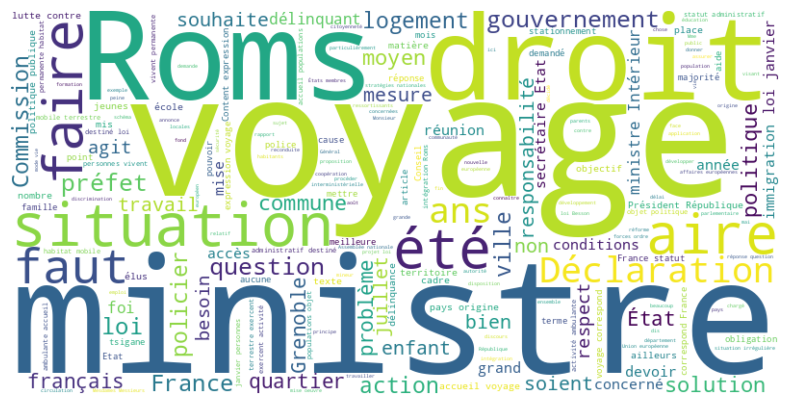

In [ ]:
#Supression des mots vides

nlp = spacy.load("fr_core_news_md")

def remove_stopwords(file_path, nlp):
    with open(file_path, 'r', encoding='utf-8') as file:
        corpus = file.read()

    doc = nlp(corpus)

    filtered_tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]

    return filtered_tokens

file_path = '/content/drive/MyDrive/output.txt'
tokens = remove_stopwords(file_path, nlp)

df = pd.DataFrame(tokens, columns=['Token'])
excel_output_path = '/content/drive/MyDrive/filtered_tokens.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Filtered tokens saved to {excel_output_path}")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La question des gens du voyage constitue un enjeu politique majeur, tant au niveau national que municipal, suscitant des débats fréquents autour de termes clés révélateurs des préoccupations gouvernementales et législatives. Parmi ces mots, "loi" émerge comme une constante, soulignant l'importance cruciale du cadre juridique dans la gestion de la vie de cette communauté. Les discussions et votes sur des textes légaux démontrent une volonté de réguler et encadrer les aspects liés aux gens du voyage.

La récurrence du terme "ministre" met en lumière l'implication directe des responsables politiques et ministériels dans l'élaboration et la mise en œuvre des politiques concernant cette communauté. Cela souligne l'engagement gouvernemental et la volonté de traiter cette question au plus haut niveau de décision.

L'inclusion fréquente du terme "Roms" révèle une dimension internationale, mettant en évidence les enjeux liés à la migration en provenance d'Europe de l'Est. Cela souligne la nécessité d'aborder la question des gens du voyage dans un contexte plus vaste, dépassant les frontières nationales.

La mention régulière de "France" indique une attention nationale envers la problématique des gens du voyage, soulignant son importance dans le débat politique français. Cela renforce l'idée que cette question est centrale dans l'agenda politique du pays.

Le mot "accueil" revient fréquemment, mettant en évidence les discussions autour des politiques d'accueil et des initiatives visant à améliorer la relation entre la communauté des gens du voyage et la société majoritaire. Cela suggère un intérêt pour la recherche de solutions favorisant une cohabitation harmonieuse.

Le terme "situation" pointe vers une préoccupation globale pour la condition sociale et économique des gens du voyage, soulignant les discussions sur les inégalités et les défis auxquels ils font face. Cela met en évidence la nécessité de comprendre les dynamiques sociales entourant cette communauté.
L'importance accordée au terme "intégration" reflète les efforts déployés pour intégrer les gens du voyage dans la société majoritaire, illustrant un débat sur la coexistence harmonieuse et les mesures nécessaires pour atteindre cet objectif.

La fréquence du mot "contre" suggère l'existence de débats et de confrontations dans le discours politique, révélant des opinions divergentes sur la meilleure approche à adopter envers la communauté des gens du voyage. Cela souligne la complexité de la question et les divergences d'opinions qui entourent cette problématique.

Enfin, la présence régulière du terme "droit" souligne l'importance des droits civiques dans le contexte des gens du voyage, mettant en avant les enjeux liés à la protection juridique de cette communauté. Cela souligne la nécessité de garantir une équité juridique pour cette population spécifique.

Dans l'ensemble, le lexique politique reflète une discussion approfondie et nuancée, mettant en évidence l'importance politique, sociale et législative accordée à la question des gens du voyage.


Words and POS saved to /content/drive/MyDrive/words_pos.xlsx


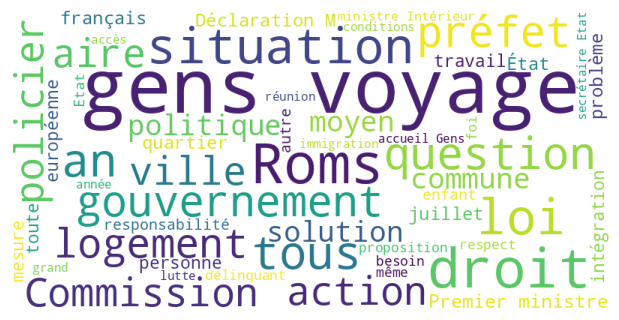

In [ ]:
#Sélection des catégories de mots d'intérêt pour votre analyse (NON, ADJ)

nlp = spacy.load("fr_core_news_md")

file_path = '/content/drive/MyDrive/output.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

doc = nlp(text)

words_pos = [(token.text, token.pos_) for token in doc if token.pos_ in ['NOUN', 'ADJ']]

df = pd.DataFrame(words_pos, columns=['Word', 'POS'])

excel_output_path = '/content/drive/MyDrive/words_pos.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Words and POS saved to {excel_output_path}")

words_for_cloud = ' '.join([word for word, pos in words_pos])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(), min_font_size=10).generate(words_for_cloud)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

L'analyse textuelle centrée sur des mots d'intérêt liés aux "gens du voyage" révèle une perspective complexe et nuancée sur les défis sociaux et politiques associés à cette communauté. Les termes tels que "situation" mettent en lumière la préoccupation pour les conditions actuelles auxquelles les gens du voyage peuvent faire face, que ce soit en termes de logement, d'emploi, ou d'intégration sociale. Les références à "lois" et "gouvernement" soulignent l'importance des cadres juridiques et des politiques gouvernementales dans la gestion des questions relatives aux gens du voyage.

Le mot "délinquant" suggère une possible stigmatisation ou criminalisation de cette communauté, soulignant un défi persistant en matière de perception sociale. En parallèle, l'accent mis sur "intégration" indique une préoccupation pour l'inclusion harmonieuse de cette population dans la société, mettant en évidence des débats sur la diversité culturelle et les efforts pour favoriser une coexistence pacifique.

Les termes "policier" et "droit" pointent vers des questions de maintien de l'ordre et de respect des droits civiques, avec des implications potentielles sur les relations entre les gens du voyage et les autorités publiques. Le mot "problème" suggère la reconnaissance de défis persistants, tandis que les références à "ville", "travail", et "quartier" indiquent des dimensions urbaines et socio-économiques dans la discussion.

La mention de "responsabilité" souligne la nécessité de clarifier les rôles et les responsabilités, que ce soit au niveau de l'État, des communes, ou de la communauté elle-même. Les termes "état" et "solution" soulèvent des questions sur le rôle de l'État dans la résolution des problèmes rencontrés par les gens du voyage et la recherche de solutions durables.

En intégrant des termes comme "immigration" et "pays d'origine", l'analyse élargit la perspective pour inclure des dimensions transnationales, soulignant les enjeux spécifiques liés aux migrations et aux origines culturelles diverses au sein de la communauté des gens du voyage. Cette exploration approfondie à travers les mots d'intérêt offre ainsi une compréhension plus riche des multiples facettes de la problématique des gens du voyage, ancrée dans des réalités sociales, économiques, politiques, et culturelles variées.

Named entities saved to /content/drive/MyDrive/named_entities.xlsx


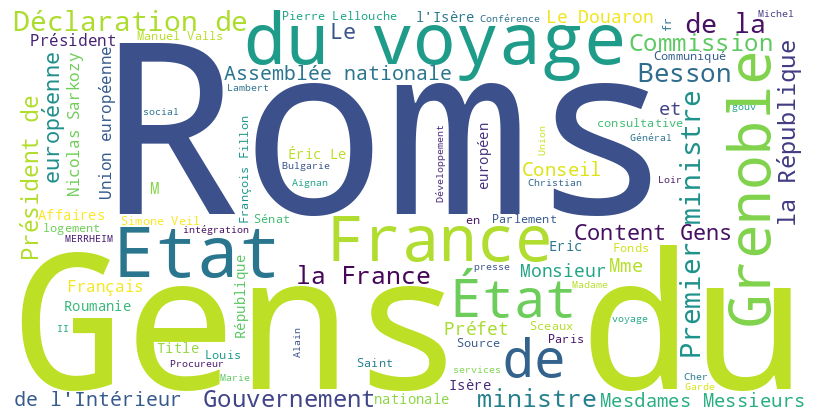

In [ ]:
#Identification des entités nommées

nlp = spacy.load("fr_core_news_md")

file_path = '/content/drive/MyDrive/output.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

doc = nlp(text)

named_entities = [(ent.text, ent.label_) for ent in doc.ents]

df = pd.DataFrame(named_entities, columns=['Entity', 'Label'])

excel_output_path = '/content/drive/MyDrive/named_entities.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Named entities saved to {excel_output_path}")

entities_for_cloud = ' '.join([ent for ent, label in named_entities])
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(entities_for_cloud)

plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Cette analyse textuelle est une compilation de mentions et de discours liés aux "gens du voyage" en France, en mettant en évidence divers acteurs et événements politiques. En langage sociologique, cela peut refléter l'attention accrue des institutions et des responsables politiques sur les questions entourant cette communauté. Les références aux lois, ministres, déclarations, et institutions telles que la Commission nationale consultative des gens de voyage indique une focalisation sur le cadre légal et institutionnel.

Cette analyse textuelle est une compilation de mentions et de discours liés aux "gens du voyage" en France, en mettant en évidence divers acteurs et événements politiques. En langage sociologique, cela peut refléter l'attention accrue des institutions et des responsables politiques sur les questions entourant cette communauté. Les références aux lois, ministres, déclarations, et institutions telles que la Commission nationale consultative des gens de voyage indique une focalisation sur le cadre légal et institutionnel.

En conclusion, cette analyse textuelle révèle une préoccupation globale et multidimensionnelle des acteurs politiques et des institutions françaises envers les gens du voyage. Elle souligne l'importance des aspects législatifs, politiques, sociaux, et économiques dans le discours et la formulation des politiques liées à cette communauté. L'inclusion de différentes perspectives politiques et la reconnaissance de la dimension transnationale de la question soulignent la complexité de cette problématique et la nécessité d'approches inclusives pour aborder les défis auxquels font face les gens du voyage en France.

Tous les mots les plus fréquents : [('voyage', 69), ('loi', 43), ('ministre', 43), ('roms', 39), ('france', 32), ('accueil', 31), ('situation', 29), ('politique', 27), ('etat', 26), ('faut', 24), ('personnes', 20), ('intégration', 20), ('été', 20), ('faire', 20), ('contre', 19), ('droit', 18), ('ans', 18), ('président', 18), ('grenoble', 18), ('populations', 17), ('gouvernement', 17), ('république', 17), ('déclaration', 16), ('question', 16), ('objet', 15), ('logement', 15), ('commission', 15), ('nationale', 15), ('préfet', 15), ('mise', 15), ('pays', 15), ('janvier', 14), ('ville', 14), ('origine', 14), ('habitat', 13), ('élus', 13), ('immigration', 13), ('août', 13), ('cadre', 13), ('moyens', 13), ('français', 13), ('besson', 12), ('juillet', 12), ('vie', 12), ('état', 12), ('européenne', 12), ('soient', 12), ('souhaite', 12), ('travail', 12), ('non', 12), ('bien', 12), ('publique', 11), ('affaires', 11), ('aires', 11), ('intérieur', 11), ('ordre', 11), ('nationales', 11), ('respect'

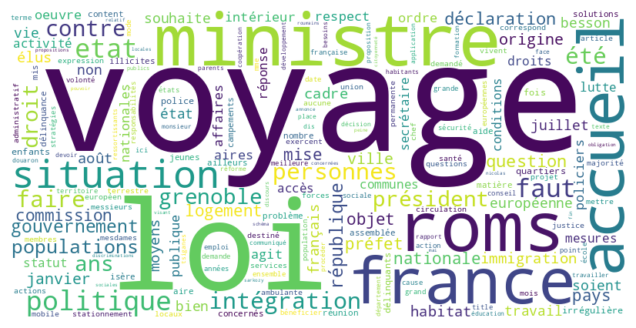

Tous les mots les plus fréquents ont été enregistrés dans /content/drive/MyDrive/most_frequent_words_all.xlsx


In [ ]:
#Sélection "tous les mots" les plus fréquents du corpus

nlp = spacy.load("fr_core_news_md")

def find_most_frequent_words(file_path, nlp, n=None):

    with open(file_path, 'r', encoding='utf-8') as file:
        corpus = file.read()

    doc = nlp(corpus)

    words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

    word_freq = Counter(words)

    most_common_words = word_freq.most_common(n)

    return most_common_words

file_path = '/content/drive/MyDrive/output.txt'

most_frequent_words = find_most_frequent_words(file_path, nlp)

print(f"Tous les mots les plus fréquents :", most_frequent_words)


word_freq_dict = dict(most_frequent_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df = pd.DataFrame(most_frequent_words, columns=['Mot', 'Fréquence'])

excel_output_path = '/content/drive/MyDrive/most_frequent_words_all.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Tous les mots les plus fréquents ont été enregistrés dans {excel_output_path}")


Selon les résultats, voici un nuage de mots montrant les termes les plus fréquents liés au sujet "gens du voyage". L'analyse fréquentielle des termes dans le corpus met en lumière les aspects saillants et les préoccupations centrales entourant la question des "gens du voyage" en France.

[('voyage', 69), ('loi', 43), ('ministre', 43), ('roms', 39), ('france', 32), ('accueil', 31), ('situation', 29), ('politique', 27), ('etat', 26), ('faut', 24), ('personnes', 20), ('intégration', 20), ('été', 20), ('faire', 20), ('contre', 19), ('droit', 18), ('ans', 18), ('président', 18), ('grenoble', 18), ('populations', 17)]


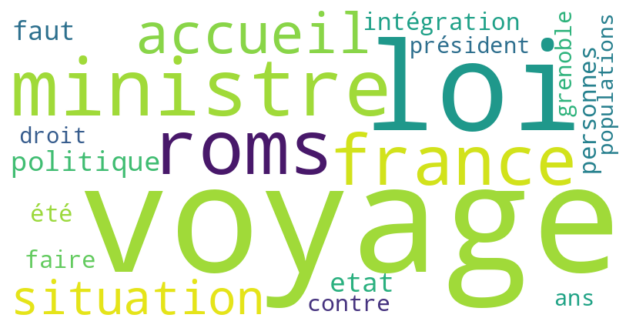

Most frequent words saved to /content/drive/MyDrive/most_frequent_words.xlsx


In [ ]:
#Sélection des 20 mots les plus fréquents du corpus (20 mots)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("fr_core_news_md")

def find_most_frequent_words(file_path, nlp):
    with open(file_path, 'r', encoding='utf-8') as file:
        corpus = file.read()

    doc = nlp(corpus)

    words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

    word_freq = Counter(words)

    most_common_words = word_freq.most_common(20)

    return most_common_words

file_path = '/content/drive/MyDrive/output.txt'

most_frequent_words = find_most_frequent_words(file_path, nlp)

print(most_frequent_words)

word_freq_dict = dict(most_frequent_words)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df = pd.DataFrame(most_frequent_words, columns=['Word', 'Frequency'])

excel_output_path = '/content/drive/MyDrive/most_frequent_words.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Most frequent words saved to {excel_output_path}")


On peut constater les 20 mots les plus fréquents, notamment « voyage », souligne l'essence nomade de la communauté des voyageurs, tandis que « loi » et « ministre » mettent l'accent sur l'implication législative et gouvernementale. Cette analyse fréquentielle donne un aperçu du discours politique sur cette question délicate en France. L'analyse fréquentielle des termes dans le corpus met en lumière les aspects saillants et les préoccupations centrales entourant la question des "gens du voyage" en France.

Le terme le plus récurrent, "voyage", évoque immédiatement la nature nomade de cette communauté, soulignant l'importance de ce mode de vie dans le discours. La fréquence élevée des termes tels que "loi" et "ministre" met en avant la dimension législative et gouvernementale, soulignant l'ampleur des politiques et des réglementations discutées et mises en œuvre pour aborder cette question complexe.

La récurrence de "roms", "france", et "accueil" pointe vers la dimension transnationale de la problématique, avec une attention particulière portée sur les flux migratoires en provenance d'Europe de l'Est. Le terme "situation" reflète une préoccupation profonde pour les conditions actuelles et les défis sociaux que rencontrent les gens du voyage, mettant en évidence les enjeux socio-économiques complexes entourant cette communauté.

[('voyage', 69), ('loi', 43), ('ministre', 43), ('roms', 39), ('france', 32), ('accueil', 31), ('situation', 29), ('politique', 27), ('etat', 26), ('faut', 24), ('personnes', 20), ('intégration', 20), ('été', 20), ('faire', 20), ('contre', 19), ('droit', 18), ('ans', 18), ('président', 18), ('grenoble', 18), ('populations', 17)]


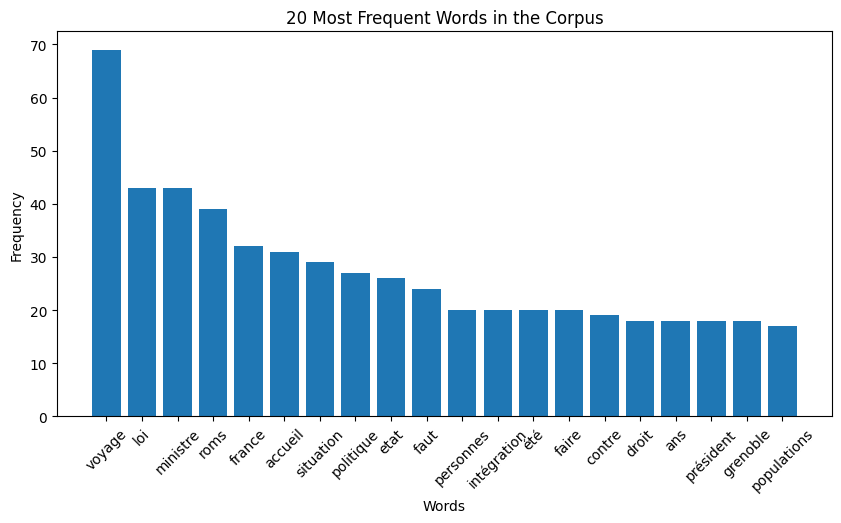

In [ ]:
#Créer un histogramme de 20 mots

file_path = '/content/drive/MyDrive/output.txt'

most_frequent_words = find_most_frequent_words(file_path, nlp)

print(most_frequent_words)

words, frequencies = zip(*most_frequent_words)
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('20 Most Frequent Words in the Corpus')
plt.show()


La présence fréquente de termes tels que "intégration", "contre", et "droit" révèle les tensions inhérentes aux débats politiques et sociaux. Ces termes traduisent les discussions autour de l'inclusion sociale, des oppositions d'opinions, et des droits fondamentaux des gens du voyage.

Enfin, les références à des lieux spécifiques tels que « Grenoble » suggère l'existence d'événements ou de situations locales qui ont marqué le discours sur les gens du voyage. Dans l'ensemble, cette analyse de fréquence offre un aperçu précieux des thèmes dominants et des préoccupations majeures qui émergent du corpus, jetant ainsi les bases d'une compréhension approfondie des discours politiques sur cette question délicate en France.


**Conclusion**

L'analyse approfondie des discours politiques et des termes clés liés aux "gens du voyage" en France révèle une problématique profondément ancrée dans le paysage politique et gouvernemental. La récurrence des mots tels que "loi", "ministre", "intégration", et "droit" met en lumière l'importance des dispositifs législatifs, des acteurs gouvernementaux, et des questions juridiques dans la gestion de cette communauté. La dimension transnationale, évoquée par des termes tels que "Roms", souligne la nécessité d'aborder cette question au-delà des frontières nationales, mettant en évidence les implications de la migration en provenance d'Europe de l'Est.

Les débats autour de l'"accueil", de la "situation", et de la "populations" dévoilent la complexité des enjeux socio-économiques et démographiques qui entourent les gens du voyage. L'attention particulière portée à des termes comme "contre" révèle une polarisation dans le discours politique, soulignant les divergences d'opinions et les débats houleux autour des approches à adopter vis-à-vis de cette communauté.

En utilisant le web scraping et une analyse linguistique, cette recherche offre un éclairage approfondi sur les discours officiels, les législations en discussion, et les positions politiques relatives aux gens du voyage. Les résultats de cette démarche soulignent l'influence significative des facteurs politiques et gouvernementaux dans la formulation des politiques publiques liées à cette communauté.

Cependant, cette analyse révèle également des défis intrinsèques, tels que la polarisation des opinions et les complexités entourant l'équilibre entre la préservation des modes de vie nomades et les exigences de stabilité sociale. En fin de compte, cette exploration approfondie des discours politiques sur les gens du voyage en France incite à une réflexion critique sur les politiques actuelles, tout en soulignant l'importance d'une approche équilibrée, respectueuse des droits fondamentaux et visant une intégration harmonieuse au sein de la société.

